In [2]:
import os 
import sys
import re 
import numpy as np
import agilent_loader as ag
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
import PyMi as pmi

folder = "26-12-2022\\Location1"

results_folder = folder+"\\Results"

pmi.check_and_prepare_folder(results_folder)

files_in_folder = pmi.get_mi_files_in_folder(folder)

print(f" Found {len(files_in_folder)} files in {folder}")


Folder '26-12-2022\Location1\Results' already exists and is now empty.
 Found 500 files in 26-12-2022\Location1


c:\Personal\Calgary\Auto_AFM\Automated_AFM_analysis\PyMi.py:162: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


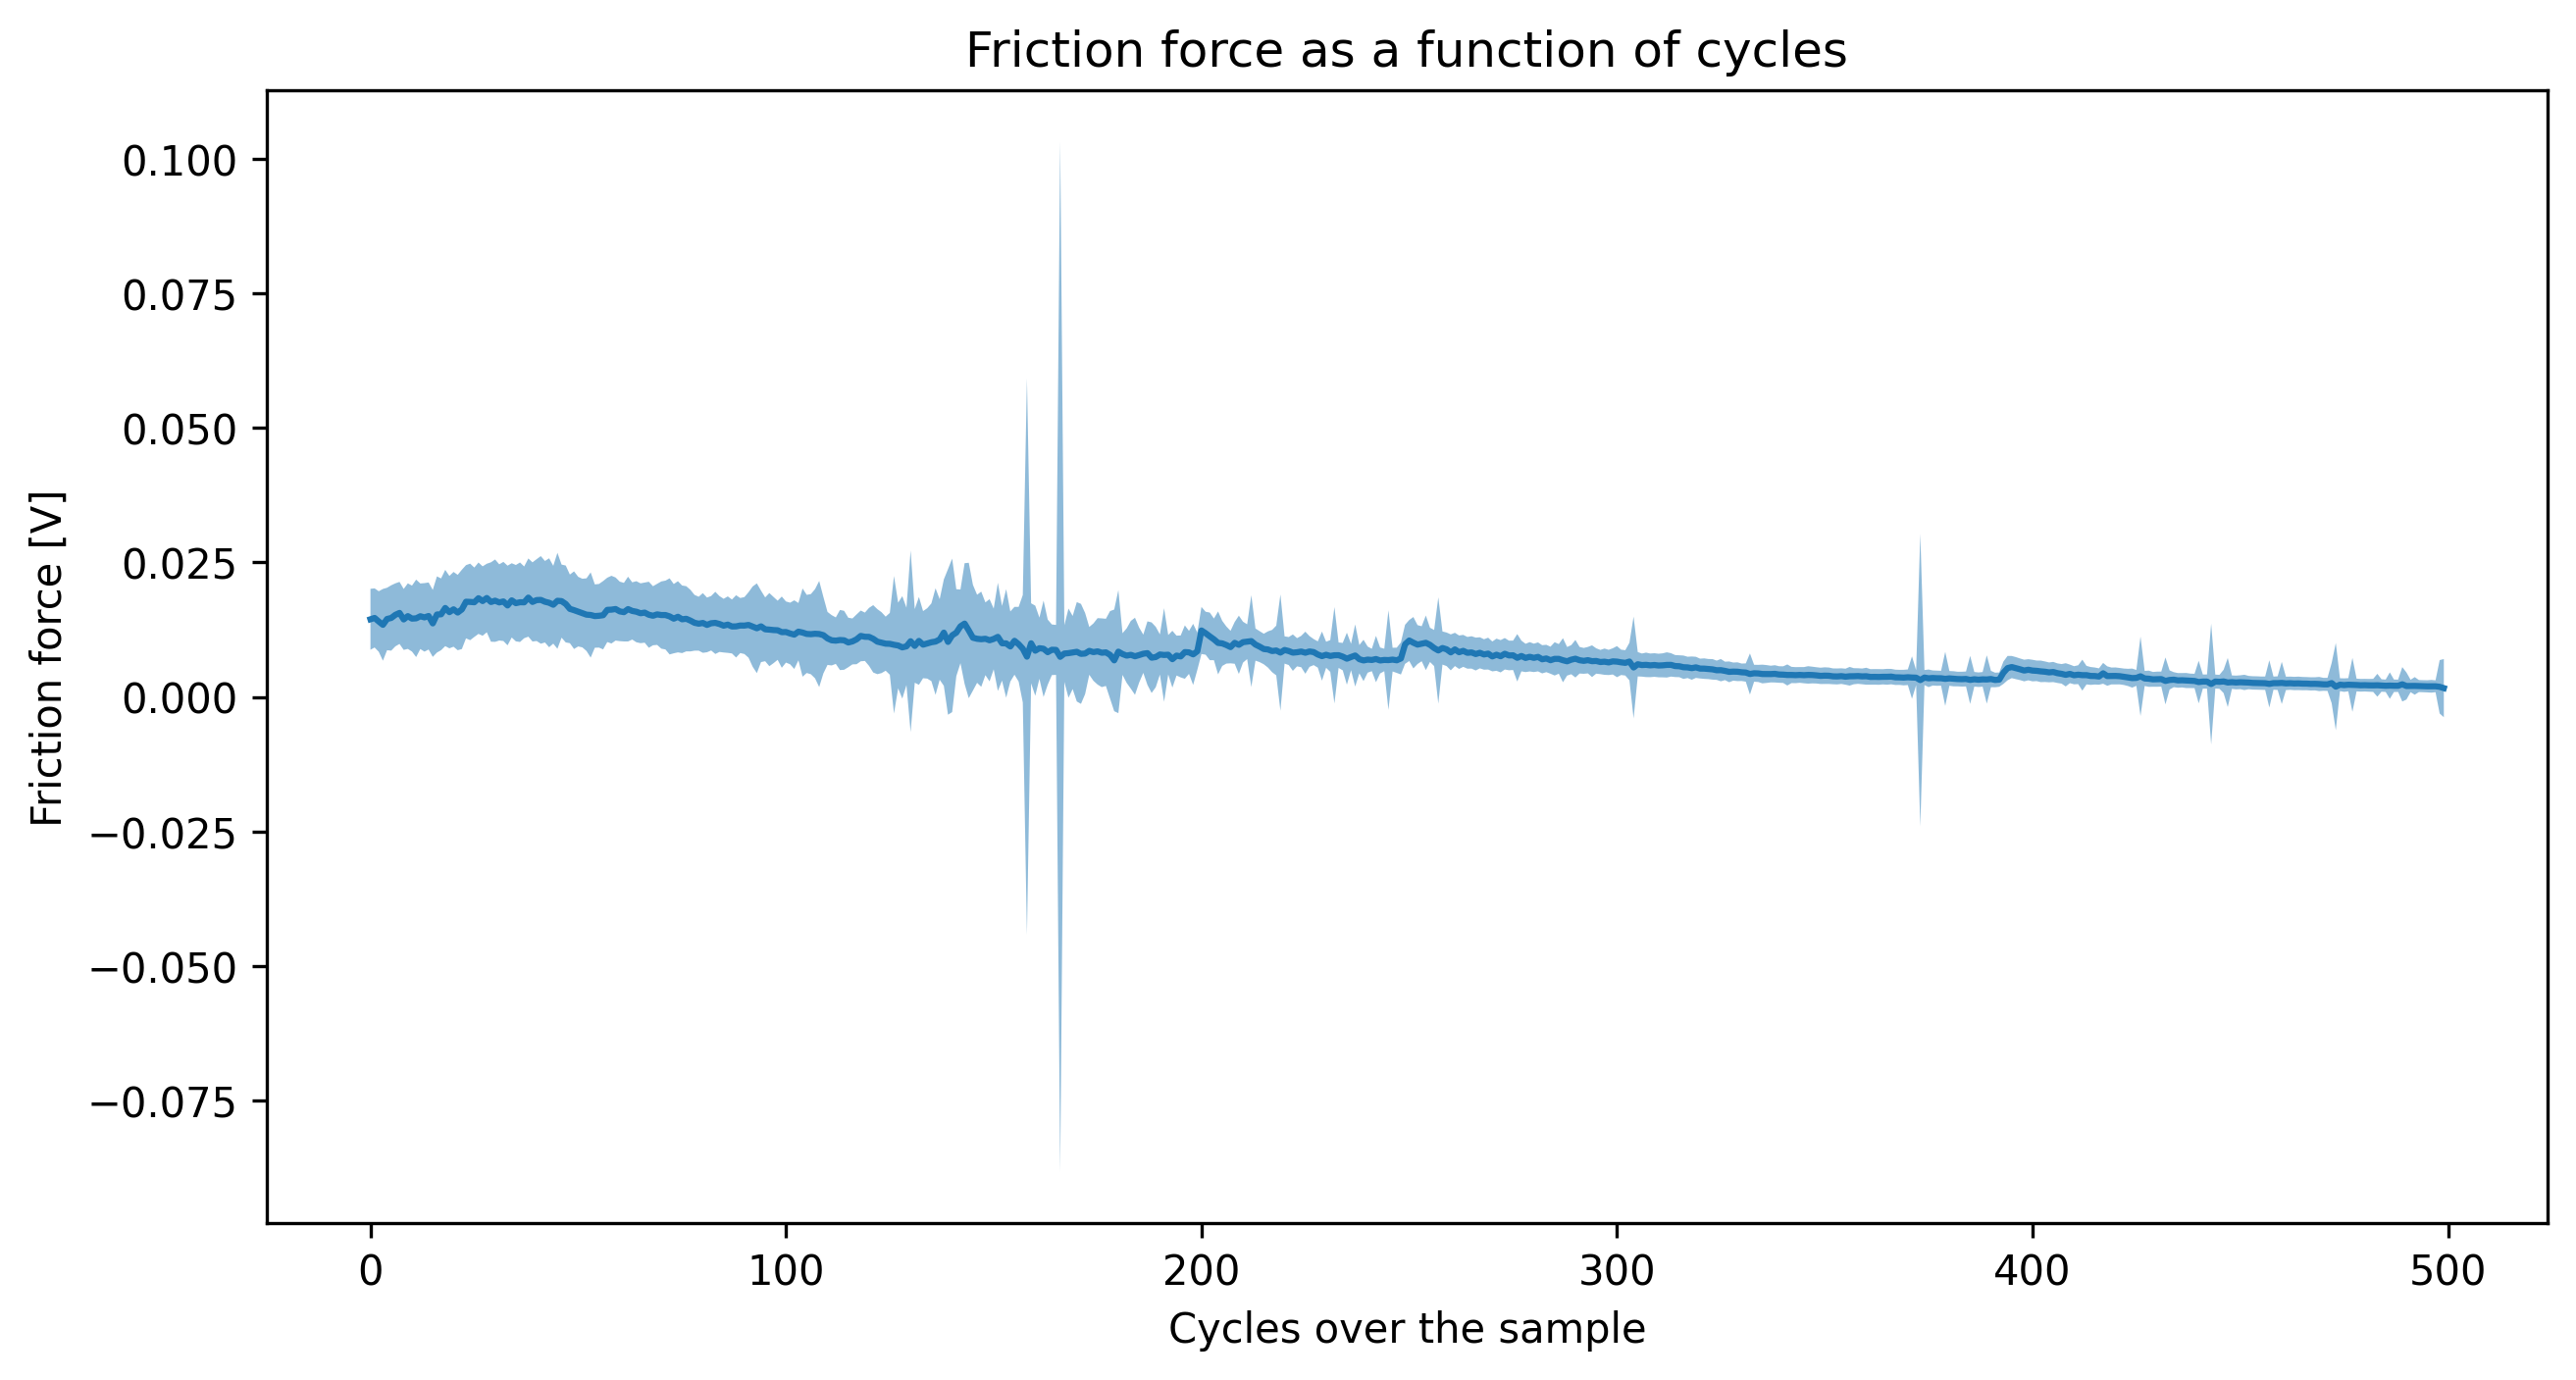

In [3]:
Cof_for_runs=np.zeros(len(files_in_folder))
Cof_for_runs_std=np.zeros(len(files_in_folder))
ii=0



for file_path in files_in_folder:
	
	file=ag.load_mi(folder+"\\"+file_path)	
	
	
	friction_arrays,topography_arrays= pmi.load_buffers_from_file(file)

	averaged_friction,Cof_for_runs[ii],Cof_for_runs_std[ii]=pmi.calculate_CoF(friction_arrays,file_path)
		
	if (ii==0):
		
		pmi.graph_friction_n_topography(file,averaged_friction,topography_arrays[0],results_folder,file_path,"Friction and Topography")

	ii+=1



pmi.plot_CoF(Cof_for_runs,Cof_for_runs_std,results_folder)





